In [36]:
import yfinance as yf
btc = yf.download(tickers='BTC-USD', start="2021-01-01", interval= '1h')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [37]:
btc

,Close
2021-01-01 00:00:00,29032.312500
2021-01-01 01:00:00,29411.566406
2021-01-01 02:00:00,29228.789062
2021-01-01 03:00:00,29330.333984
2021-01-01 04:00:00,29252.201172
...,...
2022-11-08 05:00:00,19725.630859
2022-11-08 06:00:00,19812.382812
2022-11-08 07:00:00,19834.585938
2022-11-08 08:00:00,19777.023438


In [38]:
lags = 5
cols = []
for lag in range(1,lags + 1):
    col = f'lag_{lag}'
    btc[col] = btc['Close'].shift(lag)
    cols.append(col)
btc.dropna(inplace=True)

/var/folders/rz/qcp1k29x0mx1nw_33w719nmm0000gn/T/ipykernel_751/104871385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc[col] = btc['Close'].shift(lag)
/var/folders/rz/qcp1k29x0mx1nw_33w719nmm0000gn/T/ipykernel_751/104871385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc[col] = btc['Close'].shift(lag)
/var/folders/rz/qcp1k29x0mx1nw_33w719nmm0000gn/T/ipykernel_751/104871385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [39]:
btc

,Close,lag_1,lag_2,lag_3,lag_4,lag_5
2021-01-01 05:00:00,29198.923828,29252.201172,29330.333984,29228.789062,29411.566406,29032.312500
2021-01-01 06:00:00,29170.220703,29198.923828,29252.201172,29330.333984,29228.789062,29411.566406
2021-01-01 07:00:00,29131.013672,29170.220703,29198.923828,29252.201172,29330.333984,29228.789062
2021-01-01 08:00:00,29087.369141,29131.013672,29170.220703,29198.923828,29252.201172,29330.333984
2021-01-01 09:00:00,29233.941406,29087.369141,29131.013672,29170.220703,29198.923828,29252.201172
...,...,...,...,...,...,...
2022-11-08 05:00:00,19725.630859,19677.072266,20224.279297,20536.076172,20648.949219,20531.757812
2022-11-08 06:00:00,19812.382812,19725.630859,19677.072266,20224.279297,20536.076172,20648.949219
2022-11-08 07:00:00,19834.585938,19812.382812,19725.630859,19677.072266,20224.279297,20536.076172
2022-11-08 08:00:00,19777.023438,19834.585938,19812.382812,19725.630859,19677.072266,20224.279297


In [42]:
import numpy as np
reg = np.linalg.lstsq(btc[cols], btc['Close'],rcond=None)[0]

In [43]:
reg

array([ 1.02600626, -0.05524964,  0.04029919, -0.05138638,  0.04029161])

<AxesSubplot: >

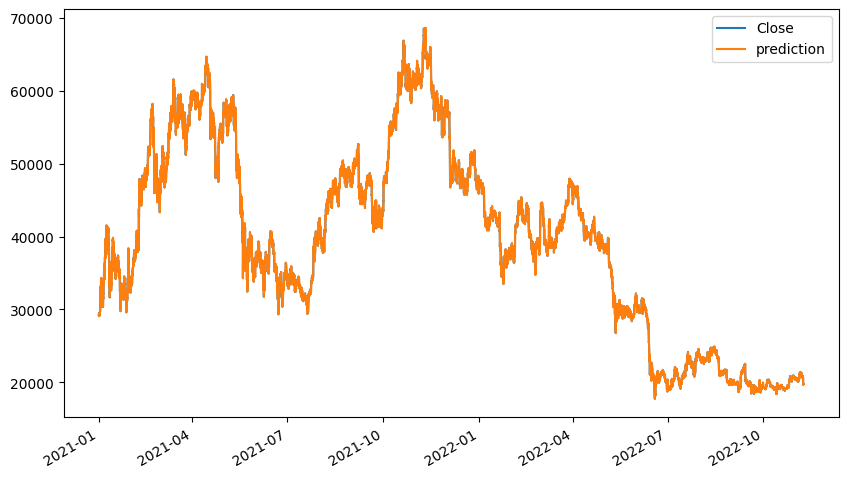

In [13]:

btc['prediction'] = np.dot(btc[cols], reg)
btc[['Close', 'prediction']].plot(figsize=(10, 6))

<AxesSubplot: >

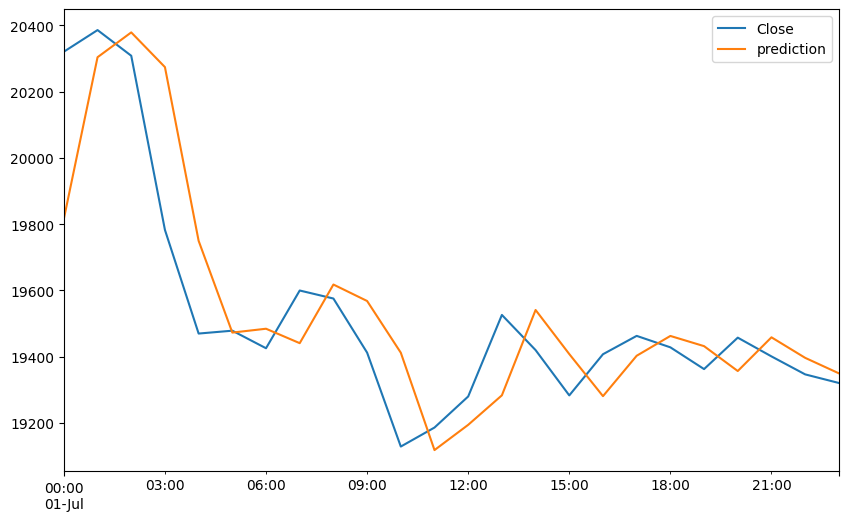

In [14]:
btc[['Close', 'prediction']].loc['2022-07-01'].plot(figsize=(10, 6))

In [45]:
btc['return'] = np.log(btc['Close']/btc['Close'].shift(1))

In [46]:
cols = []
for lag in range(1,lags + 1):
    col = f'lag_{lag}'
    btc[col] = btc['return'].shift(lag)
    cols.append(col)
btc.dropna(inplace=True)

In [47]:
btc

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,return
2021-01-01 11:00:00,29338.773438,0.002120,0.005026,-0.001499,-0.001345,-0.000984,0.001459
2021-01-01 12:00:00,29286.808594,0.001459,0.002120,0.005026,-0.001499,-0.001345,-0.001773
2021-01-01 13:00:00,29501.976562,-0.001773,0.001459,0.002120,0.005026,-0.001499,0.007320
2021-01-01 14:00:00,29372.048828,0.007320,-0.001773,0.001459,0.002120,0.005026,-0.004414
2021-01-01 15:00:00,29239.976562,-0.004414,0.007320,-0.001773,0.001459,0.002120,-0.004507
...,...,...,...,...,...,...,...
2022-11-08 05:00:00,19725.630859,-0.027430,-0.015299,-0.005481,0.005692,-0.003328,0.002465
2022-11-08 06:00:00,19812.382812,0.002465,-0.027430,-0.015299,-0.005481,0.005692,0.004388
2022-11-08 07:00:00,19834.585938,0.004388,0.002465,-0.027430,-0.015299,-0.005481,0.001120
2022-11-08 08:00:00,19777.023438,0.001120,0.004388,0.002465,-0.027430,-0.015299,-0.002906


In [48]:
reg = np.linalg.lstsq(btc[cols], btc['return'],rcond=None)[0]

In [49]:
reg

array([ 0.03387406, -0.0315157 ,  0.00867068, -0.03803779, -0.00066727])

<AxesSubplot: >

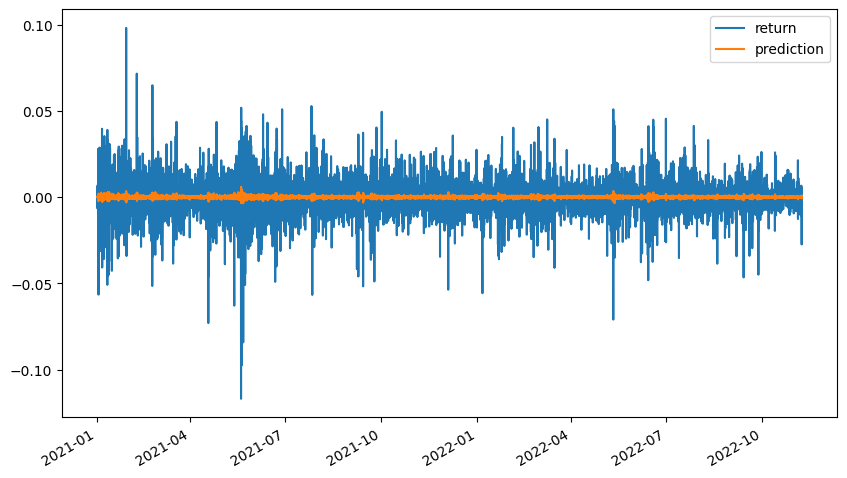

In [50]:
btc['prediction'] = np.dot(btc[cols], reg)
btc[['return', 'prediction']].iloc[lags:].plot(figsize=(10,6))

In [52]:
hits = np.sign(btc['return']*btc['prediction']).value_counts()

In [21]:
hits

 1.0    8149
-1.0    7843
dtype: int64

In [53]:
hits.values[0]/sum(hits)

0.5093796898449224

predicting future market decision

In [56]:
reg = np.linalg.lstsq(btc[cols], np.sign(btc['return']),rcond=None)[0]

In [57]:
reg

array([-0.82314828, -5.54371709, -2.82044643, -1.83082486, -1.62983775])

In [54]:
btc['prediction'] = np.sign(np.dot(btc[cols], reg))
btc['prediction'].value_counts()

-1.0    8104
 1.0    7888
Name: prediction, dtype: int64

In [55]:
btc

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,return,prediction
2021-01-01 11:00:00,29338.773438,0.002120,0.005026,-0.001499,-0.001345,-0.000984,0.001459,-1.0
2021-01-01 12:00:00,29286.808594,0.001459,0.002120,0.005026,-0.001499,-0.001345,-0.001773,1.0
2021-01-01 13:00:00,29501.976562,-0.001773,0.001459,0.002120,0.005026,-0.001499,0.007320,-1.0
2021-01-01 14:00:00,29372.048828,0.007320,-0.001773,0.001459,0.002120,0.005026,-0.004414,1.0
2021-01-01 15:00:00,29239.976562,-0.004414,0.007320,-0.001773,0.001459,0.002120,-0.004507,-1.0
...,...,...,...,...,...,...,...,...
2022-11-08 05:00:00,19725.630859,-0.027430,-0.015299,-0.005481,0.005692,-0.003328,0.002465,-1.0
2022-11-08 06:00:00,19812.382812,0.002465,-0.027430,-0.015299,-0.005481,0.005692,0.004388,1.0
2022-11-08 07:00:00,19834.585938,0.004388,0.002465,-0.027430,-0.015299,-0.005481,0.001120,1.0
2022-11-08 08:00:00,19777.023438,0.001120,0.004388,0.002465,-0.027430,-0.015299,-0.002906,1.0


In [26]:
hits = np.sign(btc['return']*btc['prediction']).value_counts()

In [27]:
hits

 1.0    8450
-1.0    7542
dtype: int64

In [28]:
hits.values[0]/sum(hits)

0.5283891945972986

In [29]:
btc.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
2021-01-01 11:00:00,29338.773438,0.002120,0.005026,-0.001499,-0.001345,-0.000984,-1.0,0.001459
2021-01-01 12:00:00,29286.808594,0.001459,0.002120,0.005026,-0.001499,-0.001345,-1.0,-0.001773
2021-01-01 13:00:00,29501.976562,-0.001773,0.001459,0.002120,0.005026,-0.001499,-1.0,0.007320
2021-01-01 14:00:00,29372.048828,0.007320,-0.001773,0.001459,0.002120,0.005026,-1.0,-0.004414
2021-01-01 15:00:00,29239.976562,-0.004414,0.007320,-0.001773,0.001459,0.002120,-1.0,-0.004507


In [30]:
btc['strategy'] = btc['prediction']*btc['return']
btc[['return', 'strategy']].sum().apply(np.exp)

return      0.675279
strategy    1.194419
dtype: float64

<AxesSubplot: >

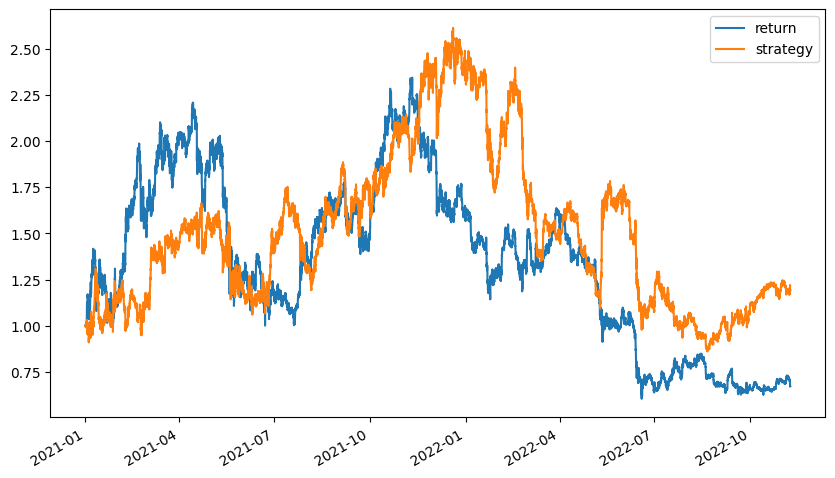

In [31]:
btc[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))